<a href="https://colab.research.google.com/github/pramod-nitk/pramod/blob/master/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))


2.5.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [207]:
os.listdir()

['.config', 'sample_submission.csv', 'test.csv', 'train.csv', 'sample_data']

In [208]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [209]:
train.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [210]:
train.isnull().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [211]:
train.dtypes

Customer ID                     object
Name                            object
Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                  object
Expense Type 2                  object
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card          object
Property ID                      int64
Property Age                   float64
Property Type                    int64
Property Location               object
Co-Applicant                     int64
Property Price                 float64
Loan Sanction Amount (USD)     float64
dtype: object

In [212]:
#1.  Data Description
#2.  Data Treatment
## a. Missing values treatment
#### aa. mean and median for numerical features
#### ab. mode for categorical feature
## b. Outlier detection and fixed for numerical features
## c. feature correlation check and remove if any
### ca. dimensionality reduction for time saving
## d. base model on final feature set
## e. feature selection and final model training and testing
## f. Logistic regression , linear regression, Decision tree, Xgboost and Deep learning model for regression or classification


In [213]:
########################################### Data Description #####################################################################

In [214]:
train.describe()


,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,30000.000000,2.515000e+04,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,501.934700,2.631119e+03,2.460067,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,288.158086,1.132268e+04,1.118562,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,251.000000,1.650450e+03,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,504.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,751.000000,3.091407e+03,3.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe96bb21190>,
      dtype=object)

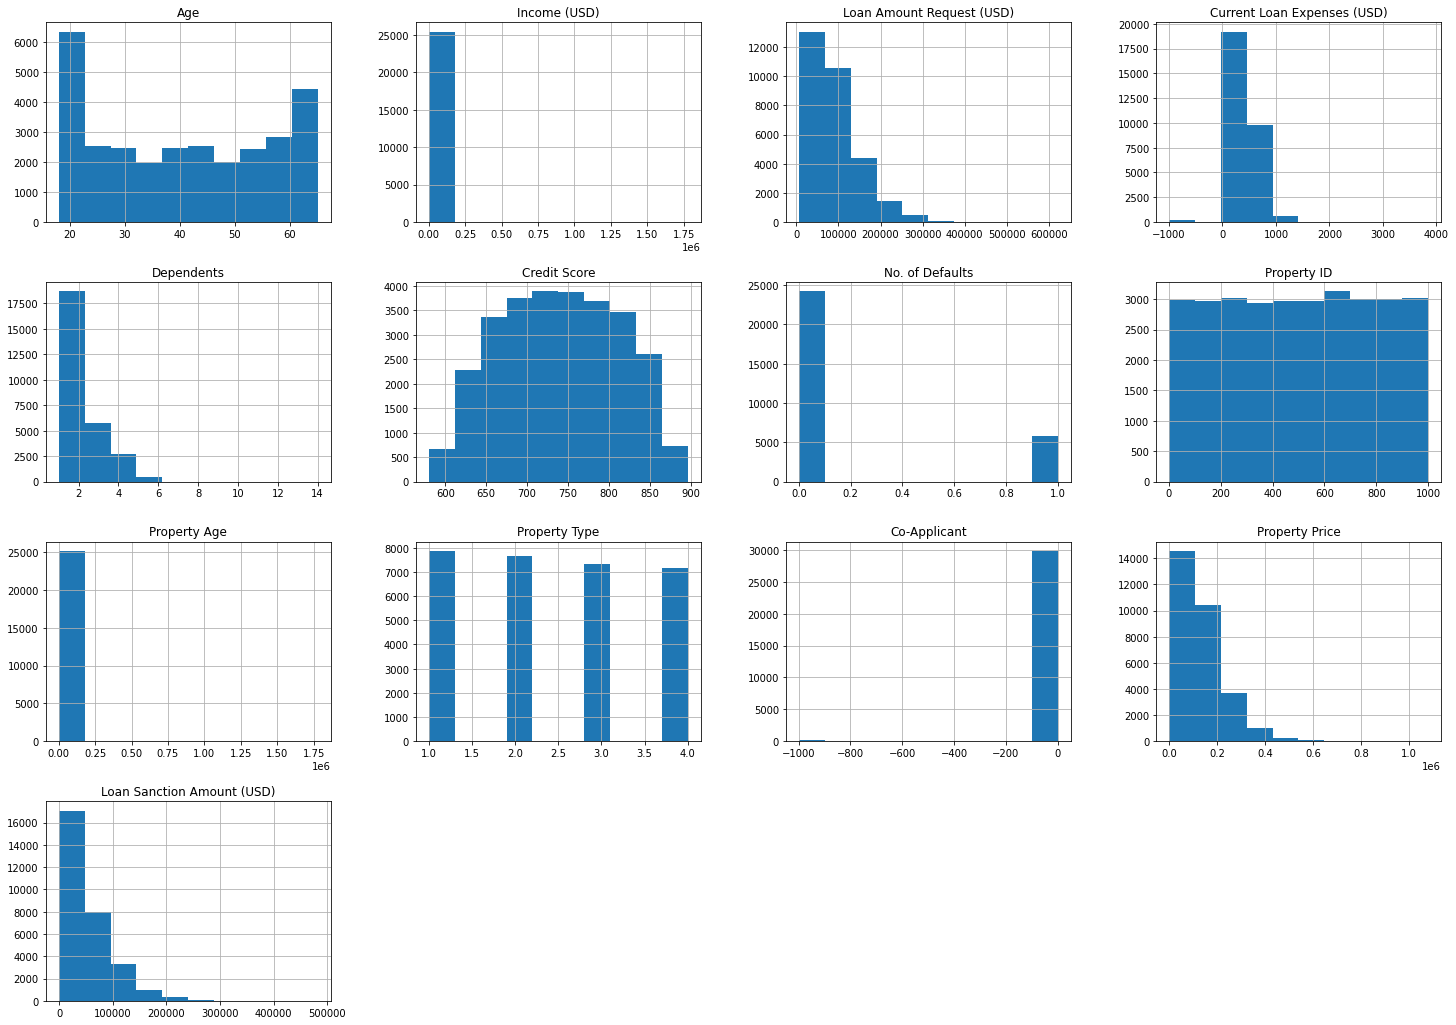

In [215]:
train.hist(figsize=(25,18))

In [216]:
train.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

In [217]:
train.dtypes

Customer ID                     object
Name                            object
Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                  object
Expense Type 2                  object
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card          object
Property ID                      int64
Property Age                   float64
Property Type                    int64
Property Location               object
Co-Applicant                     int64
Property Price                 float64
Loan Sanction Amount (USD)     float64
dtype: object

In [218]:
id_cols = ['Customer ID', 'Name']
target_col = ['Loan Sanction Amount (USD)']
numerical_cols =[]
object_cols = []

In [219]:
for col in train.columns:
  col_type = train[col].dtypes
  if col not in id_cols+target_col:
    if str(col_type)=="object":
      object_cols.append(col)
    elif str(col_type) in ["float64", "int64", "float32", "int32"] and train[col].nunique()>20:
      numerical_cols.append(col)
    elif str(col_type) in ["float64", "int64", "float32", "int32"] and train[col].nunique()<=20:
      object_cols.append(col)

In [220]:
id_cols, target_col, object_cols, numerical_cols

(['Customer ID', 'Name'],
 ['Loan Sanction Amount (USD)'],
 ['Gender',
  'Income Stability',
  'Profession',
  'Type of Employment',
  'Location',
  'Expense Type 1',
  'Expense Type 2',
  'Dependents',
  'No. of Defaults',
  'Has Active Credit Card',
  'Property Type',
  'Property Location',
  'Co-Applicant'],
 ['Age',
  'Income (USD)',
  'Loan Amount Request (USD)',
  'Current Loan Expenses (USD)',
  'Credit Score',
  'Property ID',
  'Property Age',
  'Property Price'])

In [222]:
train.replace('?', np.nan, inplace=True)
test.replace('?', np.nan, inplace=True)

In [223]:
################## change columns data type for train and test datasets ################################
def change_col_type(df):
  for col in numerical_cols:
    print(col)
    if df[col].dtypes in ['int64', 'int32']:
      df[col] = df[col].astype(int)
    else:
      df[col] = df[col].astype(float)

  for col in object_cols:
    print(col)
    df[col] = df[col].astype(str)
  
  return df

train = change_col_type(train)
test = change_col_type(test)

Age
Income (USD)
Loan Amount Request (USD)
Current Loan Expenses (USD)
Credit Score
Property ID
Property Age
Property Price
Gender
Income Stability
Profession
Type of Employment
Location
Expense Type 1
Expense Type 2
Dependents
No. of Defaults
Has Active Credit Card
Property Type
Property Location
Co-Applicant
Age
Income (USD)
Loan Amount Request (USD)
Current Loan Expenses (USD)
Credit Score
Property ID
Property Age
Property Price
Gender
Income Stability
Profession
Type of Employment
Location
Expense Type 1
Expense Type 2
Dependents
No. of Defaults
Has Active Credit Card
Property Type
Property Location
Co-Applicant


In [224]:
############################# check the values in the target variable############################

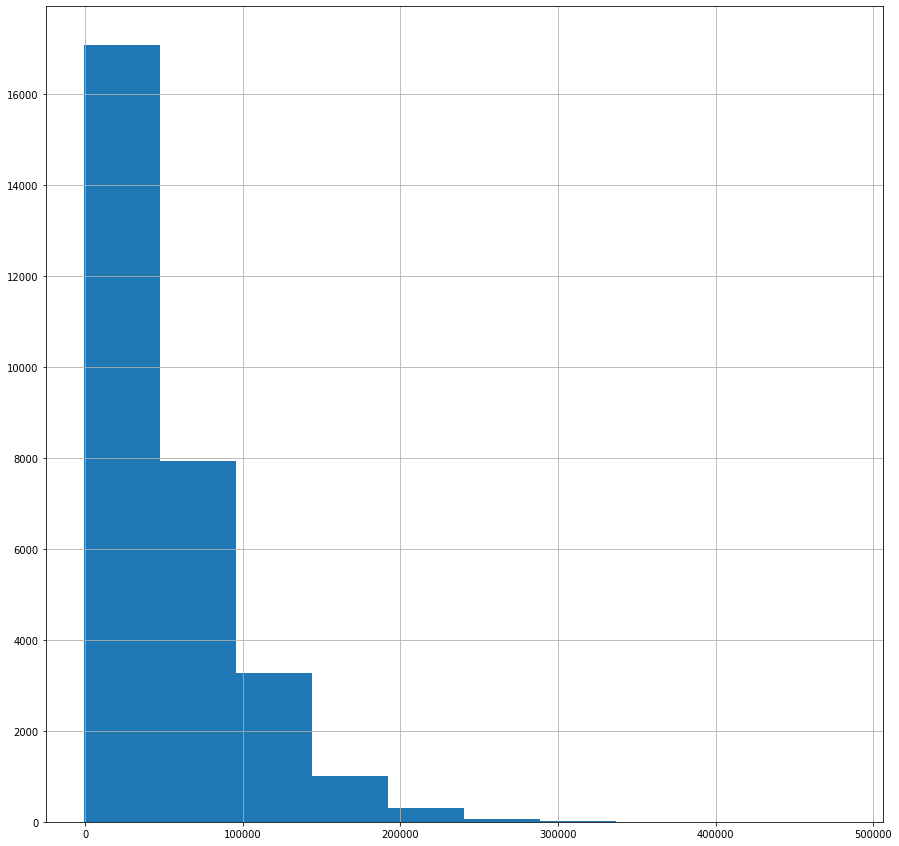

In [225]:
train['Loan Sanction Amount (USD)'].hist(figsize=(15,15), bins=10)

In [226]:
train.shape

(30000, 24)

In [227]:
print(f" out of total observation in the train dataset {train['Loan Sanction Amount (USD)'].isnull().sum()} values are null")

 out of total observation in the train dataset 340 values are null


In [228]:
train[train['Loan Sanction Amount (USD)'].isnull()]

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
108,C-14817,Deborah Polen,M,36,NaN,Low,Commercial associate,Laborers,Rural,58353.58,474.24,N,Y,1.0,670.61,0,Unpossessed,817,NaN,1,Urban,1,80524.30,NaN
114,C-24508,Minerva Saltzman,F,62,2573.03,Low,Commercial associate,Laborers,Rural,136992.15,395.22,Y,Y,3.0,701.49,1,Unpossessed,634,2573.03,2,Rural,1,251217.10,NaN
290,C-18811,Gina Domenech,M,62,681.87,High,Pensioner,nan,Semi-Urban,71468.48,363.55,N,Y,2.0,781.43,0,Unpossessed,787,681.87,2,Semi-Urban,0,123365.57,NaN
322,C-15078,Laurette Allsup,M,18,1813.77,Low,Working,Sales staff,Semi-Urban,71220.19,692.22,N,Y,3.0,750.06,0,Unpossessed,407,1813.77,2,Semi-Urban,1,134313.15,NaN
421,C-17364,Sherwood Lesniak,M,18,5203.03,Low,Commercial associate,Managers,Semi-Urban,157747.73,760.10,Y,Y,2.0,717.93,0,Inactive,890,5203.03,2,Semi-Urban,1,260733.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29834,C-3082,Nichelle Whitcomb,M,44,4948.86,nan,State servant,Core staff,Semi-Urban,173769.72,584.84,Y,Y,3.0,761.54,0,Active,168,4948.86,3,Rural,1,319712.95,NaN
29866,C-25182,Genevieve Vanatta,M,18,3090.14,Low,Working,nan,Semi-Urban,105878.07,842.49,N,Y,4.0,775.49,0,Unpossessed,740,3090.14,2,Semi-Urban,1,133391.83,NaN
29936,C-11631,Edna Jelley,F,54,NaN,Low,Working,Core staff,Semi-Urban,79030.18,252.09,Y,N,nan,698.49,0,Active,150,NaN,3,Semi-Urban,1,104437.78,NaN
29944,C-9552,Jonathon Leitner,F,36,1572.88,Low,Commercial associate,nan,Rural,176348.06,621.61,N,N,3.0,662.81,0,Unpossessed,176,1572.88,3,Rural,1,307855.67,NaN


In [229]:
train = train[train['Loan Sanction Amount (USD)'].notna()]

In [230]:
train['Loan Sanction Amount (USD)'].isnull().sum()

0

In [231]:
######################## Data treatment for the numerical features #####################################

In [232]:
missing_numeric_dict={}
missing_object_dict={}
for col in numerical_cols:
  missing_numeric_dict[col] = {col+"_mean": train[col].mean(), col+"_median":train[col].median()}

for col in object_cols:
  missing_object_dict[col] = train[col].mode()[0]

In [233]:
missing_numeric_dict

{'Age': {'Age_mean': 40.09922454484154, 'Age_median': 40.0},
 'Credit Score': {'Credit Score_mean': 739.85347481243,
  'Credit Score_median': 739.815},
 'Current Loan Expenses (USD)': {'Current Loan Expenses (USD)_mean': 400.89375241582565,
  'Current Loan Expenses (USD)_median': 375.09},
 'Income (USD)': {'Income (USD)_mean': 2630.990562641566,
  'Income (USD)_median': 2223.3},
 'Loan Amount Request (USD)': {'Loan Amount Request (USD)_mean': 88792.0572737683,
  'Loan Amount Request (USD)_median': 75114.08499999999},
 'Property Age': {'Property Age_mean': 2631.317284738969,
  'Property Age_median': 2223.965},
 'Property ID': {'Property ID_mean': 501.88182737693865,
  'Property ID_median': 504.0},
 'Property Price': {'Property Price_mean': 131733.51717026386,
  'Property Price_median': 109993.61}}

In [234]:
missing_object_dict

{'Co-Applicant': '1',
 'Dependents': '2.0',
 'Expense Type 1': 'N',
 'Expense Type 2': 'Y',
 'Gender': 'M',
 'Has Active Credit Card': 'Active',
 'Income Stability': 'Low',
 'Location': 'Semi-Urban',
 'No. of Defaults': '0',
 'Profession': 'Working',
 'Property Location': 'Semi-Urban',
 'Property Type': '1',
 'Type of Employment': 'nan'}

In [235]:
################## impute missing values in the dataframe ######################

In [236]:
def missing_transform_numeric(df):
  for col in numerical_cols:
    print(col, missing_numeric_dict[col][col+"_median"])
    df[col].fillna(missing_numeric_dict[col][col+"_median"], inplace=True)
  return df

def missing_transform_object(df):
  for col in object_cols:
    print(col, missing_object_dict[col])
    df[col].fillna(missing_object_dict[col], inplace=True)
  return df

train_treated = missing_transform_numeric(train.copy())
train_treated = missing_transform_object(train_treated)

Age 40.0
Income (USD) 2223.3
Loan Amount Request (USD) 75114.08499999999
Current Loan Expenses (USD) 375.09
Credit Score 739.815
Property ID 504.0
Property Age 2223.965
Property Price 109993.61
Gender M
Income Stability Low
Profession Working
Type of Employment nan
Location Semi-Urban
Expense Type 1 N
Expense Type 2 Y
Dependents 2.0
No. of Defaults 0
Has Active Credit Card Active
Property Type 1
Property Location Semi-Urban
Co-Applicant 1


In [237]:
train_treated.isnull().sum()

Customer ID                    0
Name                           0
Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [238]:
################### outlier detection and treatment ####################################

In [239]:
outlier_dict = {}
def fit_outlier(df):
  for col in numerical_cols:
    low = df[col].quantile(0.01)
    high = df[col].quantile(0.99)
    outlier_dict[col] = {"low":low, "high":high}

fit_outlier(train_treated)

In [240]:
outlier_dict

{'Age': {'high': 65.0, 'low': 18.0},
 'Credit Score': {'high': 873.25, 'low': 600.5936},
 'Current Loan Expenses (USD)': {'high': 1048.2223, 'low': 76.4618},
 'Income (USD)': {'high': 7023.443599999999, 'low': 787.155},
 'Loan Amount Request (USD)': {'high': 275793.7551, 'low': 12050.6292},
 'Property Age': {'high': 7008.0545, 'low': 791.4593},
 'Property ID': {'high': 989.0, 'low': 11.0},
 'Property Price': {'high': 436441.52209999994, 'low': -999.0}}

In [241]:
def transform_outlier(df):
  for col in numerical_cols:
    print(col)
    df[col] = np.where(df[col]<outlier_dict[col]["low"],outlier_dict[col]["low"], df[col])
    df[col] = np.where(df[col]>outlier_dict[col]["high"],outlier_dict[col]["high"], df[col])
  return df

train_treated_outlier = transform_outlier(train_treated)

Age
Income (USD)
Loan Amount Request (USD)
Current Loan Expenses (USD)
Credit Score
Property ID
Property Age
Property Price


In [242]:
train_treated.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56.0,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,nan,746.0,1933.050,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32.0,4952.91,Low,Working,nan,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608.0,4952.910,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65.0,988.19,High,Pensioner,nan,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546.0,988.190,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65.0,2223.30,High,Pensioner,nan,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890.0,2223.965,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31.0,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,nan,745.55,1,Active,715.0,2614.770,4,Semi-Urban,1,208567.91,74008.28


In [243]:
########################## Multi column label binarizer ##########################################

In [244]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)


In [245]:
train_treated_outlier_label = MultiColumnLabelEncoder(columns = object_cols).fit_transform(train_treated_outlier)

In [246]:
########################## correlation matrix ######################

In [247]:
corr_mat = train_treated_outlier_label.corr()

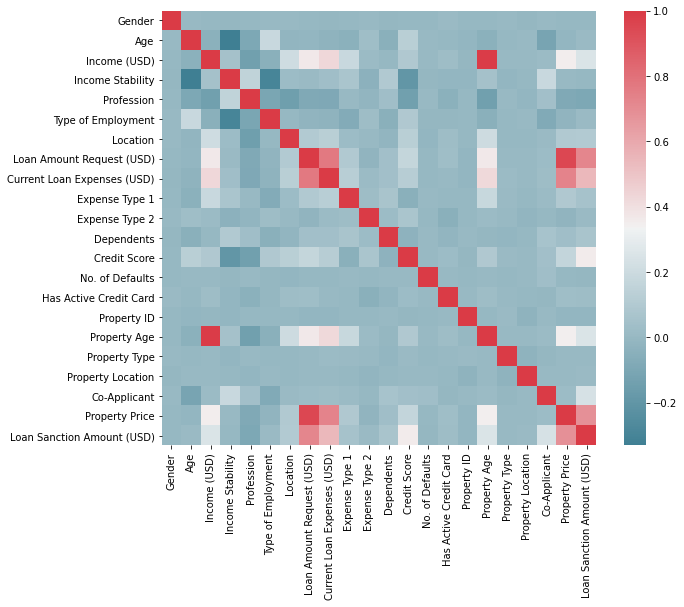

In [248]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr_mat, mask=np.zeros_like(corr_mat, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [249]:
##################### data normalization for the numerical features #################################

In [250]:
def minmax_normalization(df):
  for col in numerical_cols:
    df[col] = (df[col]-df[col].min())/(df[col].max()-df[col].min())
  return df

scaled_df = minmax_normalization(train_treated_outlier_label)

In [251]:
scaled_df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,0,0.808511,0.183746,1,7,14,1,0.230372,0.169402,0,0,4,0.765969,0,3,0.751534,0.183636,3,0,2,0.276455,54607.18
1,C-33999,America Calderone,1,0.297872,0.667986,1,7,18,1,0.131897,0.431535,0,1,0,0.659462,0,2,0.610429,0.669410,1,0,2,0.127537,37469.98
2,C-3770,Rosetta Verne,0,1.000000,0.032236,0,3,18,1,0.127178,0.098263,0,1,0,0.852928,0,2,0.547035,0.031646,1,2,1,0.167885,36474.43
3,C-26480,Zoe Chitty,0,1.000000,0.230288,0,3,18,0,0.257854,0.228532,0,1,3,0.851278,1,2,0.898773,0.230433,1,1,2,0.279902,56040.54
4,C-23459,Afton Venema,0,0.276596,0.293061,1,7,6,1,0.386013,0.427007,0,1,10,0.531645,1,0,0.719836,0.293297,3,1,2,0.479075,74008.28


In [252]:
#################### perform the same operations on the test dataset #####################################

In [253]:
test.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,396.72,N,N,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.50
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,463.76,Y,Y,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.30
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,nan,Semi-Urban,176684.91,493.15,N,Y,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,nan,Rural,97009.18,446.15,N,Y,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.10
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,nan,Urban,109980.00,370.10,N,N,nan,NaN,0,nan,356,1939.23,4,Semi-Urban,1,180908.00


In [254]:
test.isnull().sum()

Customer ID                      0
Name                             0
Gender                           0
Age                              0
Income (USD)                   750
Income Stability                 0
Profession                       0
Type of Employment               0
Location                         0
Loan Amount Request (USD)        0
Current Loan Expenses (USD)     83
Expense Type 1                   0
Expense Type 2                   0
Dependents                       0
Credit Score                   743
No. of Defaults                  0
Has Active Credit Card           0
Property ID                      0
Property Age                   892
Property Type                    0
Property Location                0
Co-Applicant                     0
Property Price                 168
dtype: int64

In [255]:
test_treated = missing_transform_numeric(test.copy())
test_treated = missing_transform_object(test_treated)


Age 40.0
Income (USD) 2223.3
Loan Amount Request (USD) 75114.08499999999
Current Loan Expenses (USD) 375.09
Credit Score 739.815
Property ID 504.0
Property Age 2223.965
Property Price 109993.61
Gender M
Income Stability Low
Profession Working
Type of Employment nan
Location Semi-Urban
Expense Type 1 N
Expense Type 2 Y
Dependents 2.0
No. of Defaults 0
Has Active Credit Card Active
Property Type 1
Property Location Semi-Urban
Co-Applicant 1


In [256]:
test_treated.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,396.72,N,N,2.0,799.140,0,Unpossessed,843,3472.69,2,Urban,1,236644.50
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,463.76,Y,Y,2.0,833.310,0,Unpossessed,22,1184.84,1,Rural,1,142357.30
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,nan,Semi-Urban,176684.91,493.15,N,Y,3.0,627.440,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,nan,Rural,97009.18,446.15,N,Y,2.0,833.200,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.10
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,nan,Urban,109980.00,370.10,N,N,nan,739.815,0,nan,356,1939.23,4,Semi-Urban,1,180908.00


In [257]:
test_treated['Property Price'].value_counts(), train['Property Price'].value_counts(), train_treated['Property Price'].value_counts()

(109993.61    168
 37220.06       2
 197833.75      2
 88372.15       2
 77441.22       2
             ... 
 239450.45      1
 95426.73       1
 117867.03      1
 259019.53      1
 475852.06      1
 Name: Property Price, Length: 19824, dtype: int64, -999.00       341
  77957.35       2
  57914.08       2
  279299.82      2
  28252.49       2
              ... 
  282237.12      1
  108754.71      1
  116798.58      1
  190803.36      1
  260239.33      1
 Name: Property Price, Length: 29303, dtype: int64, -999.0000       341
  436441.5221    297
  57914.0800       2
  279299.8200      2
  51652.5200       2
                ... 
  27603.2900       1
  264143.9500      1
  35831.6800       1
  282237.1200      1
  260239.3300      1
 Name: Property Price, Length: 29007, dtype: int64)

In [260]:
test_treated.dtypes

Customer ID                     object
Name                            object
Gender                          object
Age                            float64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                  object
Expense Type 2                  object
Dependents                      object
Credit Score                   float64
No. of Defaults                 object
Has Active Credit Card          object
Property ID                    float64
Property Age                   float64
Property Type                   object
Property Location               object
Co-Applicant                    object
Property Price                 float64
dtype: object

In [259]:
test_treated_outlier = transform_outlier(test_treated)

Age
Income (USD)
Loan Amount Request (USD)
Current Loan Expenses (USD)
Credit Score
Property ID
Property Age
Property Price


In [261]:
test_treated_outlier_label = MultiColumnLabelEncoder(columns = object_cols).transform(test_treated_outlier)
scaled_df_test = minmax_normalization(test_treated_outlier_label)

In [272]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(scaled_df, test_size=0.2, shuffle=True)

In [273]:
X_train.shape, X_test.shape

((23728, 24), (5932, 24))

In [274]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
model = XGBRegressor()
model.fit(X_train[numerical_cols+object_cols], X_train[target_col])

[18:47:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [275]:
preds = model.predict(X_test[numerical_cols+object_cols])

In [276]:
mean_squared_error(X_test[target_col], preds), mean_absolute_error(X_test[target_col], preds), r2_score(X_test[target_col], preds)

(543821428.4583764, 13304.984815551063, 0.7723640458713922)

In [277]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [288]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.05, 0.001]
        }

In [289]:
xgb = XGBRegressor( n_estimators=600, objective='reg:linear',
                    silent=True, nthread=1)

In [290]:
from datetime import datetime
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
folds = 5

# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = GridSearchCV(xgb, params, n_jobs=-1, cv=3, verbose=True)

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(scaled_df[numerical_cols+object_cols],scaled_df[target_col])
timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 1215 candidates, totalling 3645 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 19.7min


In [ ]:
print(random_search.best_score_)
print(random_search.best_params_)

In [ ]:
model_final =  random_search.best_estimator_
y_predict_train = random_search.best_estimator_.predict(scaled_df[numerical_cols+object_cols])
y_predict_test = random_search.best_estimator_.predict(scaled_df_test[numerical_cols+object_cols])